<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/Unsupervised_ML_Project/blob/main/Unsupervised_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#more libraries to data transformation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


### Dataset First View

In [ ]:
# Dataset First Look
import io
netflix_df = pd.read_csv((io.BytesIO(uploaded['NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'])),encoding='unicode_escape')
print(netflix_df.sample(10))

     show_id     type                                 title  \
2615   s2616    Movie                           Happy Times   
373     s374    Movie  Albert Pinto Ko Gussa Kyun Aata Hai?   
2957   s2958    Movie                       Imperial Dreams   
5830   s5831    Movie                           Straight Up   
2559   s2560  TV Show                        Guru Aur Bhole   
238     s239    Movie       A Thin Line Between Love & Hate   
1742   s1743  TV Show                              Diablero   
218     s219  TV Show                       A Queen Is Born   
6146   s6147    Movie                        The Bling Ring   
889     s890    Movie                             Bheemayan   

                    director  \
2615  Luis Javier M. Henaine   
373          Soumitra Ranade   
2957           Malik Vitthal   
5830           James Sweeney   
2559                     NaN   
238          Martin Lawrence   
1742                     NaN   
218             Carla Barros   
6146           Sof

In [ ]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
print('Shape of Dataset',netflix_df.shape)
print('Count of Rows',netflix_df.shape[0])
print('Count of Columns',netflix_df.shape[1])

Shape of Dataset (7787, 12)
Count of Rows 7787
Count of Columns 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Count of Duplicate values in the dataset : ',len(netflix_df[netflix_df.duplicated()]),"Values")

Count of Duplicate values in the dataset :  0 Values


* From the above result, we clearly see that there are no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Null values in each columns')
netflix_df.isnull().sum()

Null values in each columns


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

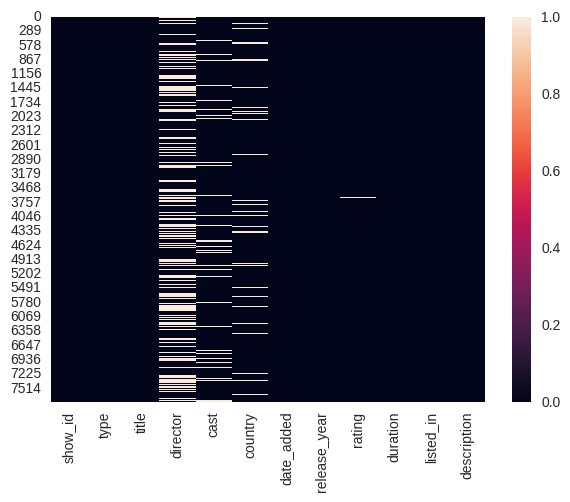

In [ ]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(netflix_df.isnull())
plt.show()

### What did you know about your dataset?

From the study, we see that dataset "Netflix Movies and TV Shows Clustering" comprises 12 columns, with only one column having an integer data type.

From the analysis, we found that there is no duplicate values in any of the features.

Regarding null out of 12 columns, dataset have null values in five columns: director, cast, country, date_added, and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Columns in the dataset : ")
netflix_df.columns

Columns in the dataset : 


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Each column in the dataset is a variable which impacting the Netflix Movies and TV Shows Clustering Dataset.

Description of those variables are as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique values in each variable')
print("          ")

for i in netflix_df.columns:
  print('Count of unique values in :',i ,"-",netflix_df[i].nunique())# '{netflix_df[i].nunique()}')

Number of unique values in each variable
          
Count of unique values in : show_id - 7787
Count of unique values in : type - 2
Count of unique values in : title - 7787
Count of unique values in : director - 4049
Count of unique values in : cast - 6831
Count of unique values in : country - 681
Count of unique values in : date_added - 1565
Count of unique values in : release_year - 73
Count of unique values in : rating - 14
Count of unique values in : duration - 216
Count of unique values in : listed_in - 492
Count of unique values in : description - 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Here we're handling the null values from all features

print('Null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum())
#As we know five colums have null values, we are checking the percentage of those values
print("----------------------------------------------")
print('Percentage of null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum()/len(netflix_df)*100)

Null values in each columns
----------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
----------------------------------------------
Percentage of null values in each columns
----------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


* From the result, we see that 'date_added' and 'rating' variables have very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
* On other send, We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high because we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
* We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
# As per our discussion

# Imputing null values of director and cast feature with unknown
netflix_df[['director','cast']]=netflix_df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
netflix_df['country']=netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
#Checking the outcome of above process
print('Null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum())

Null values in each columns
----------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


▶   **Some of the features have nested(combined) values like 'director', 'cast', 'listed_in' and 'country'. So we are handling those nested columns.**

In [ ]:
# Let's create a copy of dataframe and unnest the original one
new_netflix_df = netflix_df.copy()

# Unnesting 'Directors' column
dir_constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = netflix_df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
3614,Kevin Hart's Guide to Black History,Tom Stern
5285,Pocoyo Carnival,Unknown
6886,The Eyes of My Mother,Nicolas Pesce
3562,Kanavu Variyam,Arun Chidambaram
7809,Trailer Park Boys: Out of the Park: USA,Unknown
4493,Money Talks,Brett Ratner
6601,The Animal People,Denis Hennelly
2441,Frat Star,Grant S. Johnson
3137,I Am Me!,Unknown
3376,Japan Sinks: 2020,Unknown


In [ ]:
# Unnesting 'listed_in' column
listed_constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(listed_constraint, index = netflix_df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Genre'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Genre
1847,"Berlin, I Love You",Dramas
7158,Kabali (Hindi Version),Dramas
1757,Because We're Heading Out,International Movies
648,Acapulco La vida va,Dramas
3547,Dark Places,Dramas
10146,Once Upon a Time in Mumbai Dobaara!,Music & Musicals
7737,Latte and the Magic Waterstone,Comedies
11729,Same Kind of Different as Me,Dramas
5430,Good Time,Independent Movies
10088,Omar and Salma 3,Romantic Movies


In [ ]:
# Unnesting 'cast' column
cast_constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(cast_constraint, index = netflix_df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Actors'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Actors
9509,Chappie,Yo-Landi Visser
52430,Trolls Holiday Special,Anna Kendrick
34427,Penelope,Catherine O'Hara
32589,Obvious Child,Jennifer Kim
41135,Sparkle,Dorian Harewood
7318,Bleach,Fumiko Orikasa
56454,Zindagi Na Milegi Dobara,Hrithik Roshan
23012,Jo Koy: In His Elements,Andrew Orolfo
38224,Saint Seiya: The Lost Canvas,Tomohiro Tsuboi
21803,Incredibles 2 (Spanish Version),Oliver DÃ­az Barba


In [ ]:
# Unnesting 'country' column
country_constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = netflix_df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
5466,Nuestra Lucha Libre,United States
1923,Daemonium,Argentina
2403,Elephants Dream 4 Hour,Netherlands
3492,Hunter in the Blue Side of Manchester,United Kingdom
1710,Clarence Clemons: Who Do I Think I Am?,United States
6661,Shaka Zulu,Italy
2407,Eli,United States
2833,Ä°stanbul KÄ±rmÄ±zÄ±sÄ±,Turkey
1375,Bugs,Netherlands
723,Asperger's Are Us,United States


**Great, we have sucessfully separated values in the nested columns.**

**Next we have to merge all the created dataframe into the single dataframe.**

In [ ]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
merged_df = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
merged_df.head()

,title,Genre,Directors,Actors,Country
0,3%,International TV Shows,Unknown,JoÃ£o Miguel,Brazil
1,3%,International TV Shows,Unknown,Bianca Comparato,Brazil
2,3%,International TV Shows,Unknown,Michel Gomes,Brazil
3,3%,International TV Shows,Unknown,Rodolfo Valente,Brazil
4,3%,International TV Shows,Unknown,Vaneza Oliveira,Brazil


In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe using left join

netflix_df = merged_df.merge(netflix_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
netflix_df.head(5)

,title,Genre,Directors,Actors,Country,type,date_added,release_year,rating,duration,description
0,3%,International TV Shows,Unknown,JoÃ£o Miguel,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,International TV Shows,Unknown,Bianca Comparato,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,International TV Shows,Unknown,Michel Gomes,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,International TV Shows,Unknown,Rodolfo Valente,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,International TV Shows,Unknown,Vaneza Oliveira,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


Next step is to looking to correct the datatype of each columns

####**Typecasting the attributes**

In [ ]:
print('Columns in the dataset before typecasting')
netflix_df.columns.tolist()

Columns in the dataset before typecasting


['title',
 'Genre',
 'Directors',
 'Actors',
 'Country',
 'type',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'description']

In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
netflix_df['duration']= netflix_df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
netflix_df['date_added']= pd.to_datetime(netflix_df['date_added'])

# Extracting date, day, month and year from date_added column
netflix_df["day_added"]= netflix_df["date_added"].dt.day
netflix_df["month_added"]= netflix_df["date_added"].dt.month
netflix_df["year_added"]= netflix_df["date_added"].dt.year

# Dropping date_added
netflix_df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Checking info of the dataset after typecasting
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Genre         175807 non-null  object
 2   Directors     175807 non-null  object
 3   Actors        175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


###**Bining the features**

In the rating column, we have different categories of content classified based on content rating these categories are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's look at some the categories and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

These are the explanations for some categories in the rating column. To reduce the complications, we are binning these several categories into some basic categories like.,

* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

In [ ]:
#Reviewing the dataset after the process
netflix_df.head()

In [ ]:
# Spearating the dataframes for further analysis
df_movies= netflix_df[netflix_df['type']== 'Movie']
df_tvshows= netflix_df[netflix_df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(25,10))
for i,j,k in ((netflix_df, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

labels = ['TV Show', 'Movie']
values = [netflix_df.type.value_counts()[1], netflix_df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***